In [4]:
import numpy as np
from scipy.linalg.blas import dgemv, ddot, dnrm2
from IPython.display import Image


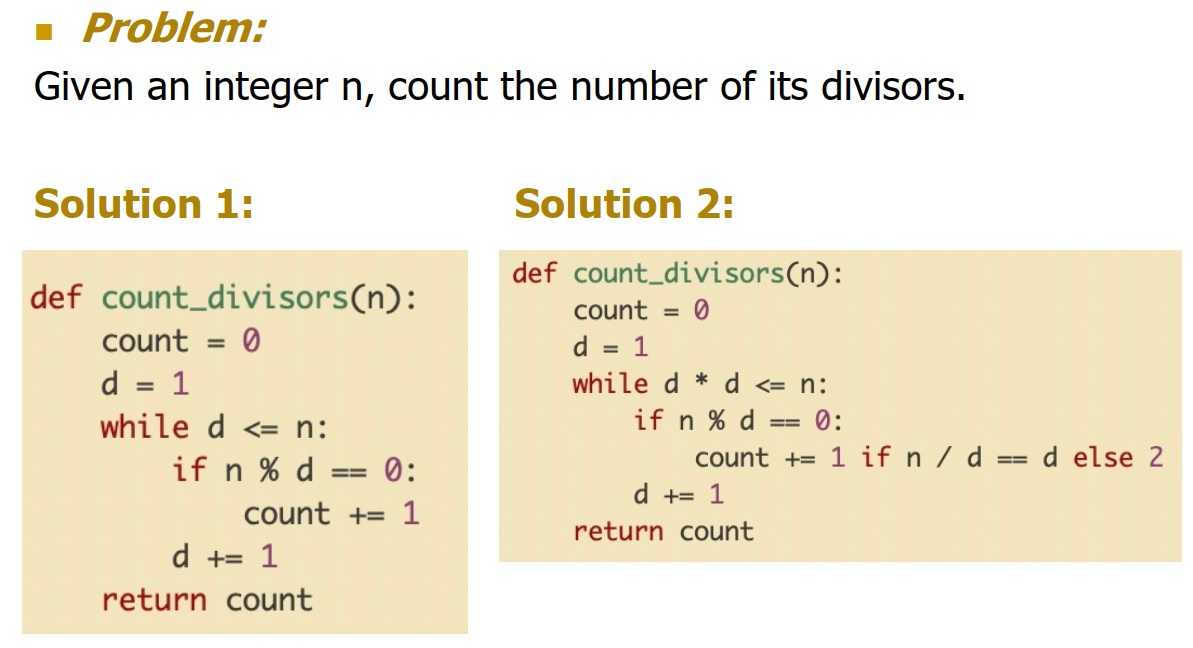

In [14]:
Image("C:/Users/simo1/Desktop/img1.jpg")

## Introduction

In [15]:
def count_divisors_1(n):
    count=0
    d=1
    while d<=n:
        if n%d==0:
            count +=1
        d+=1
    return count

**1. Description of solution 1**:<br>The function count_divisors_1 takes an integer n as input and counts the number of divisors of n. It initializes a counter variable count to zero and a variable d to 1. Then it enters a while loop that continues as long as d is less than or equal to n. Inside the loop, the function checks if n is divisible by d using the modulo operator\% . If the result is zero, it increments count by 1. Finally, it increments d by 1 and continues with the next iteration of the loop. Once the loop ends, the function returns the final value of count

In [16]:
def count_divisors_2(n):
    count=0
    d=1
    while d*d<=n:
        if n%d==0:
            count +=1 if n/d==d else 2
        d+=1
    return count

**2. Description of solution 2**:<br>count_divisors_2 is a function that takes an integer n as input and returns the number of positive divisors of n. It uses an optimized algorithm to count the divisors by iterating only up to the square root of n. If a divisor d is found, the function increments the counter count by 1 if d is a perfect square divisor, or by 2 if d is not a perfect square divisor (in this case, both d and n/d are divisors). Finally, the function returns the total count of divisors.


**3. Comparison of the two programs in term of speed**:
<br><br>

Testing for n = 10
count_divisors_1 took 0.000000 seconds.
count_divisors_2 took 0.000000 seconds.
------------------------
Testing for n = 100
count_divisors_1 took 0.000000 seconds.
count_divisors_2 took 0.000000 seconds.
------------------------
Testing for n = 10000000
count_divisors_1 took 1.449336 seconds.
count_divisors_2 took 0.000000 seconds.
------------------------


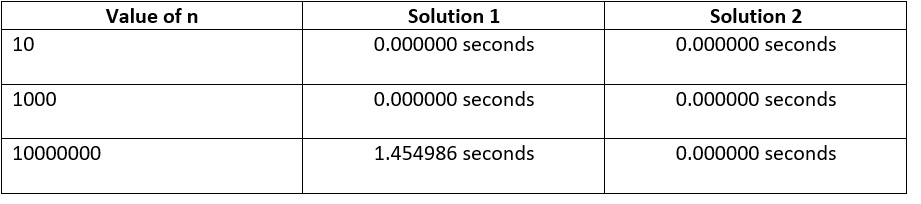

In [21]:
import time

n_values = [10, 100, 10000000]

for n in n_values:
    print(f"Testing for n = {n}")
    
    # Test count_divisors_so1
    start_time = time.time()
    count_divisors_1(n)
    end_time = time.time()
    print(f"count_divisors_1 took {end_time - start_time:.6f} seconds.")
    
    # Test count_divisors_so2
    start_time = time.time()
    count_divisors_2(n)
    end_time = time.time()
    print(f"count_divisors_2 took {end_time - start_time:.6f} seconds.")
    
    print("------------------------")
Image("C:/Users/simo1/Desktop/time.jpg")

**4. The number of operations for each solution**:<br>

Testing for n = 10
count_divisors_1 returned 4 and executed 24 operations.
count_divisors_2 returned 4 and executed 15 operations.
------------------------
Testing for n = 1000
count_divisors_1 returned 16 and executed 2016 operations.
count_divisors_2 returned 16 and executed 117 operations.
------------------------
Testing for n = 10000000
count_divisors_1 returned 64 and executed 20000064 operations.
count_divisors_2 returned 64 and executed 9582 operations.
------------------------


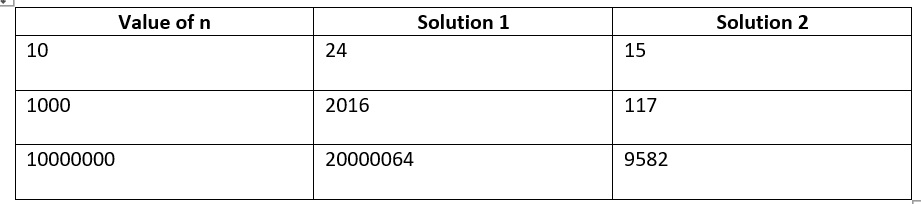

In [22]:
def count_divisors_1(n):
    count = 0
    d = 1
    ops = 0
    while d <= n:
        if n % d == 0:
            count += 1
            ops += 1
        d += 1
        ops += 2 # addition and comparison
    return count, ops

def count_divisors_2(n):
    count = 0
    d = 1
    ops = 0
    while d * d <= n:
        if n % d == 0:
            count += 1
            if n / d == d:
                ops += 2 # division and comparison
            else:
                count += 1
                ops += 3 # division, addition and comparison
        d += 1
        ops += 3 # multiplication, addition and comparison
    return count, ops

n_values = [10, 1000, 10000000]

for n in n_values:
    print(f"Testing for n = {n}")
    
    # Test count_divisors_1
    count_1, ops_1 = count_divisors_1(n)
    print(f"count_divisors_1 returned {count_1} and executed {ops_1} operations.")
    
    # Test count_divisors_2
    count_2, ops_2 = count_divisors_2(n)
    print(f"count_divisors_2 returned {count_2} and executed {ops_2} operations.")
    
    print("------------------------")
Image("C:/Users/simo1/Desktop/operations.jpg")

The initial solution uses a while loop that runs from d=1 to d<=n, causing it to execute n times. It comprises one modulus operation and one addition operation inside the loop, leading to a total of 2n operations.
On the other hand, the alternative solution uses a while loop that runs from 1 to the square root of n, resulting in it executing the square root of n times. It comprises three operations inside the loop, leading to a total of 3 times the square root of n operations.

# Big-O notation

**1. Proof of $T(n) = \mathcal{O}(n^3)$:**<br>
$𝑇(𝑛) = 3𝑛^3 + 2𝑛^2 + \frac{1}{2}𝑛 + 7 ≤ 3𝑛^3 + 2𝑛^3 + \frac{1}{2}𝑛^3 + 7𝑛^3$ (since $𝑛 ≥ 1$) $= 13.5𝑛^3$<br>
We can now choose 𝑐 = 13.5 and $𝑛_0 = 1$. Then, for all $𝑛 \ge 1$, we obtain:<br>
$𝑇(𝑛) \le 13.5𝑛^3$<br>
This demonstrates that 𝑇(𝑛) is $\mathcal{O}(𝑛^3)$, since we have found constants 𝑐 and $n_0$ that satisfy the definition of big-O notation. Therefore, we can conclude that $𝑇(𝑛) = \mathcal{O}(𝑛^3)$.
<br><br>

**2. Proof of $\forall k \ge 1, n^k $ is not $ \mathcal{O}(n^{k-1})$:**<br>
In order to demonstrate that $\forall k \ge 1, n^k $ is not $ \mathcal{O}(𝑛^{(𝑘-1)})$, we will employ proof by contradiction.
Let us assume that there are constants 𝑐 and $𝑛_0$ such that $𝑛^𝑘 \le 𝑐𝑛^{(𝑘-1)} $ for all $ 𝑛 \ge 𝑛_0$.
To simplify this inequality, we can divide both sides by $𝑛^{(𝑘-1)}$ (since $𝑛 \ge n_0 $ and $ 𝑘 \ge 1$, we know that $𝑛^{(𝑘-1)} \neq 0$).
This yields the inequality $n \le c$ for all $n \ge n_0$.
However, this contradicts the fact that c is a constant, as 𝑛 can be made arbitrarily large. Thus, our initial assumption that $𝑛^𝑘 $ is $ \mathcal(𝑛^{(𝑘-1)})$ must be false. Consequently, we have established that $\forall k \ge 1, n^k $ is not $ \mathcal{O}(𝑛^{(𝑘-1)})$.

## Merge sort

**1. Python function to sort two arrays:**<br>


In [44]:
import numpy as np
A = np.array([2,5,8,17,19])
B = np.array([1,4,5,7,11,14])

def merge_sort(A,B):
  
            
    return c

In [45]:
n = len(A) + len(B)
c = np.array((1,n))
c

array([ 1, 11])

In [46]:
merge_sort(A,B)

array([ 1, 11])

In [32]:
def merge(A, B):
    c = np.empty(len(A) + len(B), dtype=A.dtype)
    i = j = k = 0
    while i < len(A) and j < len(B):
        if A[i] <= B[j]:
            c[k] = A[i]
            i += 1
        else:
            c[k] = B[j]
            j += 1
        k += 1
    while i < len(A):
        c[k] = A[i]
        i += 1
        k += 1
    while j < len(B):
        c[k] = B[j]
        j += 1
        k += 1
    return c

**2. Analyzing the complexity of the merge function using Big-O notation:** <br><br>
Using the divide-and-conquer approach, the time complexity of the optimized merge function is $\mathcal{O}(m\log{(m+n)})$, where m and n denote the lengths of the input arrays A and B, respectively.<br><br>
This is due to the fact that the function divides the input arrays recursively into halves until it reaches the base case of arrays with 0 or 1 length. Afterward, it merges the subarrays in a bottom-up approach. The number of recursive calls is proportional to the height of the recursive call tree, which is $\log{(m+n)}$ for two arrays with lengths m and n. In each recursive call, two subarrays with a total length of m+n are compared and merged, which takes O(m+n) time. Thus, the total time complexity of the function is $\mathcal{O}((m+n)\log{(m+n)})$.
If both arrays have the same length and all elements in one array are greater than all elements in the other array, the function would require $\log{(m+n)}$ recursive calls. In each recursive call, the function would merge two subarrays of size $\frac{m}{2}$ and $\frac{n}{2}$. Thus, in the worst case, the total time complexity of the function is $\mathcal{O}(m\log{(m+n)})$ or $\mathcal{O}(n\log{(m+n)})$, whichever is larger.

## The master method

**1. Analyzing the complexity of merge sort using master method:**<br><br>
The master method is a technique that can be used to analyze the time complexity of divide-and-conquer algorithms, such as merge sort and binary search. To apply the master method, we need to represent the time complexity of the algorithm in the following form: $T(n) = aT(\frac{n}{b}) + f(n)$, where T(n) is the time complexity of the algorithm, a is the number of subproblems, $\frac{n}{b}$ is the size of each subproblem, and f(n) is the time complexity of dividing the problem and combining the solutions.

For merge sort, we divide the input array into two halves of equal size, recursively sort each half, and then merge the sorted halves using the merge function with $\mathcal{O}(n)$ time complexity. Thus, the time complexity of merge sort can be represented as $T(n) = 2T(\frac{n}{2}) + \mathcal{O}(n)$.

According to the master method, there are three possible cases for the time complexity of the algorithm based on the value of $f(n)$:

If $f(n) = \mathcal{O}(n^c)$ for some constant $c \lt \log_{b}{(a)}$, then $T(n) = \mathcal{O}(n^c)$.
If $f(n) = \mathcal{O}(n^c\log(n))$ for some constant $c = \log_{b}{(a)}$, then $T(n) = \mathcal{O}(n^c\log{(n)})$.
If $f(n) = \mathcal{O}(n^c)$ for some constant $c \gt \log_{b}(a)$, then $T(n) = \mathcal{O}(n^c)$.
For merge sort, we have $a = 2$, $b = 2$, and $f(n) = \mathcal{O}(n)$. Therefore, $c = \log_{b}{(a)} = \log_{2}{(2)} = 1$, and we are in case 2 of the master method. Thus, the time complexity of merge sort is $\mathcal{O}(n\log{(n)})$.

On the other hand, binary search is a divide-and-conquer algorithm for searching a sorted array by repeatedly dividing the search interval in half. Its time complexity can be represented as $T(n) = T(\frac{n}{2}) + \mathcal{O}(1)$. In this case, $a = 1$, $b = 2$, and $f(n) = \mathcal{O}(1)$. Thus, $c = \log_{b}(a) = \log_{2}(1) = 0$, and we are in case 1 of the master method. Therefore, the time complexity of binary search is $\mathcal{O}(\log(n))$.

In summary, the master method provides a convenient way to determine the time complexity of divide-and-conquer algorithms, and it can be used to show that the time complexity of merge sort is $\mathcal{O}(n\log{(n)})$ and that the time complexity of binary search is $\mathcal{O}(\log(n))$.

## Bonus

**1. Merge sort function in Python**

In [ ]:
def merge_sort(A, B):
    # Check if one or both arrays are empty
    if not A:
        return B
    elif not B:
        return A
    
    # Divide the input arrays into two halves
    mid_a = len(A) // 2
    mid_b = len(B) // 2
    
    # Recursively sort the left and right halves of each array
    left_a = merge_sort(A[:mid_a], B[:mid_b])
    right_a = merge_sort(A[mid_a:], B[mid_b:])
    
    # Merge the sorted halves of the arrays
    return merge(left_a, right_a)

def merge(left, right):
    result = []
    i = j = 0
    # Compare and merge the elements from both arrays
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    # Append any remaining elements in the left or right array
    result += left[i:]
    result += right[j:]
    return result

# Example usage
A = [5, 2, 8, 4, 1]
B = [7, 3, 6, 9]
sorted_array = merge_sort(A, B)
print(sorted_array)


**2. Analyzing The complexity of the previous algorithm without using  the master theorem:**<br><br>
    To determine the time complexity of merge sort, we can use a recursion tree. At each level of the tree, the size of the input arrays is halved. The number of levels in the tree is given by $\log_2(n)$, where $n$ is the size of the input.

At level $i$ of the tree, there are $2^i$ subproblems, each with an input size of $n/2^i$. Therefore, the time complexity of each level $i$ is $O(n)$. To obtain the total time complexity of merge sort, we sum the time complexities of all levels, from $i=0$ to $i=\log_2(n)$.

Thus, we can express the time complexity of merge sort as:

\begin{equation*}
T(n) = O(n) + O(n) + O(n\log_2(n-1)) + ... + O(n\log_2(n/n))
\end{equation*}

Simplifying the expression gives:

\begin{align*}
T(n) &= O(n\log_2(n))
\end{align*}

Therefore, the time complexity of merge sort is $O(n\log_2(n))$. This makes merge sort a highly efficient sorting algorithm for large input sizes.

The Master Theorem outlines the time complexity of divide-and-conquer algorithms, and it has three cases. We will provide the proofs for each case.

**Case 1:** If $f(n) = O(n^{\log_b(a - \varepsilon)})$ for some $\varepsilon > 0$, then $T(n) = \Theta(n^{\log_b(a)})$.

We can see that in this case, the work done inside the recursive calls is greater than the work done outside the recursive calls. To prove this, we express $T(n)$ as $T(n) = aT(n/b) + f(n)$, and use $f(n) \leq c*n^{\log_b(a - \varepsilon)}$ for sufficiently large $n$. By recursively applying this inequality, we obtain $T(n) \leq \Theta(n^{\log_b(a)})$. Similarly, $T(n) = \Omega(n^{\log_b(a)})$. Hence, $T(n) = \Theta(n^{\log_b(a)})$.

**Case 2:** If $f(n) = \Theta(n^{\log_b(a)})$, then $T(n) = \Theta(n^{\log_b(a)}*\log(n))$.

This case deals with algorithms where the work done inside and outside the recursive calls is evenly balanced. We can express $T(n)$ as $T(n) = aT(n/b) + f(n)$, and apply the Master Theorem to get $T(n) = \Theta(n^{\log_b(a)}\log(n))$.

**Case 3:** If $f(n) = \Omega(n^{\log_b(a + \varepsilon)})$ for some $\varepsilon > 0$ and $af(n/b) \leq cf(n)$ for some constant $c < 1$ and sufficiently large $n$, then $T(n) = \Theta(f(n))$

In this case, the work done outside the recursive calls is greater than the work done inside the recursive calls. We can express $T(n)$ as $T(n) = aT(n/b) + f(n)$, and use $f(n) \geq c*n^{\log_b(a + \varepsilon)}$ for sufficiently large $n$. By recursively applying this inequality, we obtain $T(n) \geq \Omega(f(n))$. Similarly, $T(n) = O(f(n))$. Hence, $T(n) = \Theta(f(n))$.







**4. Analyzing the complexity of the quicksort algorithm:**<br><br>
Quicksort is an algorithm based on the divide-and-conquer technique. It involves selecting a pivot element from the given array and dividing the remaining elements into two sub-arrays, based on whether they are smaller or larger than the pivot. These sub-arrays are then sorted recursively using quicksort. The overall steps for quicksort include selecting the pivot, partitioning the array, and recursively sorting the sub-arrays.

The worst-case time complexity of quicksort is $O(n^2)$, which happens when the pivot is consistently the smallest or largest element in the array. On the other hand, the average and best-case time complexities of quicksort are $O(n\log{n})$. The time complexity of quicksort can be broken down into three parts, including partitioning the array, the best-case scenario, and the worst-case scenario.

Partitioning the array requires $O(n)$ time in the worst case. The best-case scenario occurs when the pivot divides the array into two sub-arrays of roughly equal size, resulting in a recursion depth of $O(\log{n})$ and a time complexity of $O(n\log{n})$. In contrast, the worst-case scenario arises when the pivot is always the smallest or largest element in the array, resulting in a recursion depth of n and a time complexity of $O(n^2)$.

In summary, quicksort has an average and best-case time complexity of $O(n\log{n})$ and a worst-case time complexity of $O(n^2)$. Quicksort is known for its superior performance over other sorting algorithms due to its cache efficiency and low memory requirements.

## Matrix multiplication

**1. Function that multiply two matrices:**

In [6]:
def matrix_multiply(A, B):
    """
    Multiplies two matrices A and B using nested loops.
    Assumes A and B are non-empty and have compatible dimensions.
    Returns the product matrix C = AB.
    """
    # Get the number of rows and columns of matrices A and B
    m, p = len(A), len(B)
    n, q = len(B[0]), len(A[0])

    # Check if the matrices have compatible dimensions
    if p != n:
        raise ValueError("Matrices have incompatible dimensions")

    # Initialize the product matrix with zeros
    C = [[0 for j in range(q)] for i in range(m)]
    
    # Compute the dot product for each row of A and each column of B
    for i in range(m):
        for j in range(q):
            for k in range(p):
                C[i][j] += A[i][k] * B[k][j]
    
    return C


**2. Analyzing the complexity of the previous algorithm using big-O notation:**<br><br>
The matrix multiplication algorithm has a time complexity of $O(n^3)$ due to the presence of three nested loops over matrices of size n. The reason behind this is that for each element in the resulting matrix, we need to perform n multiplications and n additions. Thus, the total number of operations increases in proportion to $n^3$, resulting in a cubic time complexity


**3. The same algorithm in C:**

In [8]:
pip install jupyter-c-kernel

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jupyter-c-kernel: filename=jupyter_c_kernel-1.2.2-py3-none-any.whl size=6607 sha256=a3ddfbc297b481b4feb7b75097515b9af37512a24ae80d1eeccfb38f1468ba17
  Stored in directory: c:\users\simo1\appdata\local\pip\cache\wheels\6a\e5\2b\afe567f0fc6ff534cda2bb4202ee1bcdf58b6d0f47cf26f4b8
Successfully built jupyter-c-kernel
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#include <stdio.h>

#define ROW_A 3
#define COL_A 2
#define ROW_B 2
#define COL_B 3

void matrix_multiply(int A[][COL_A], int B[][COL_B], int C[][COL_B]) {
    for (int i = 0; i < ROW_A; ++i) {
        for (int j = 0; j < COL_B; ++j) {
            C[i][j] = 0;
            for (int k = 0; k < COL_A; ++k) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

void print_matrix(int matrix[][COL_B], int row, int col) {
    for (int i = 0; i < row; ++i) {
        for (int j = 0; j < col; ++j) {
            printf("%d ", matrix[i][j]);
        }
        printf("\n");
    }
}

int main() {
    int A[ROW_A][COL_A] = {{1, 2}, {3, 4}, {5, 6}};
    int B[ROW_B][COL_B] = {{1, 2, 3}, {4, 5, 6}};
    int C[ROW_A][COL_B];

    matrix_multiply(A, B, C);

    print_matrix(C, ROW_A, COL_B);

    return 0;
}


**4. Optimization of the function of multiplication provided in the previous answer:**<br><br>
The original matrix multiplication algorithm has a time complexity of O($n^3$). To improve the efficiency of the algorithm, a technique called "loop unrolling" can be utilized. This technique involves processing multiple elements in a single iteration, which reduces the number of loop iterations required and results in faster execution.

The number of elements processed in each iteration is known as the "unroll factor". By increasing the unroll factor, the overhead of the loop can be further reduced, resulting in even faster execution times.

Below is an optimized implementation of the matrix multiplication algorithm that utilizes loop unrolling with an unroll factor of 4:


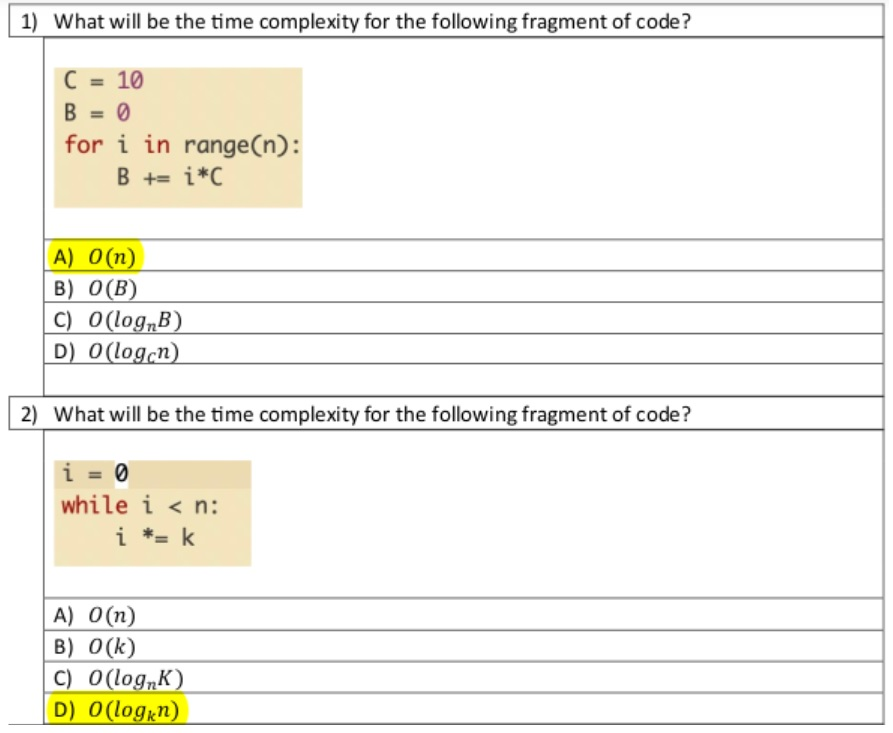

In [10]:
Image("C:/Users/simo1/Desktop/last.jpg")


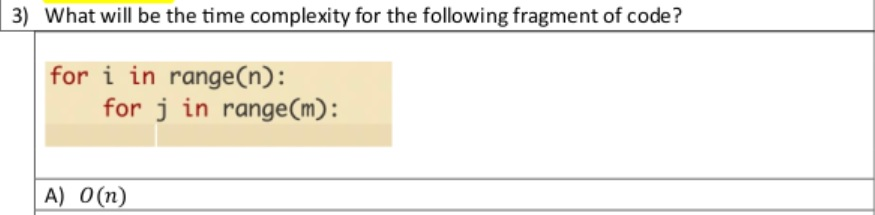

In [11]:
Image("C:/Users/simo1/Desktop/last2.jpg")